In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
import os
import glob
import matplotlib.pyplot as plt

/home/ali/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('HousesDataset/HousesInfo.txt', header=None, sep=' ', names=['bedrooms', 'bathrooms', 'area', 'zipcode', 'price'])

In [3]:
data

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


In [4]:
data.index.values + 1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [5]:
sorted(list(glob.glob(os.path.sep.join(['HousesDataset', "{}_*".format(1)]))))

['HousesDataset/1_bathroom.jpg',
 'HousesDataset/1_bedroom.jpg',
 'HousesDataset/1_frontal.jpg',
 'HousesDataset/1_kitchen.jpg']

In [6]:
basepath = os.path.sep.join(['HousesDataset', "{}_*".format(1)])
imgPaths = sorted(list(glob.glob(basepath)))
inputImages = []
for imgPath in imgPaths:
    image = cv2.resize(cv2.imread(imgPath), (64, 64))
    inputImages.append(image)
np.shape(inputImages)

(4, 64, 64, 3)

In [7]:
images = []
for i in data.index.values:
    basepath = os.path.sep.join(['HousesDataset', "{}_*".format(i + 1)])
    imgPaths = sorted(list(glob.glob(basepath)))
    inputImages = []
    for imgPath in imgPaths:
        image = cv2.resize(cv2.imread(imgPath), (64, 64))
        inputImages.append(image)
    outputImage = np.zeros((128, 128, 3), dtype='uint8')
    outputImage[0:64, 0:64] = inputImages[0]
    outputImage[0:64, 64:128] = inputImages[1]
    outputImage[64:128, 64:128] = inputImages[2]
    outputImage[64:128, 0:64] = inputImages[3]
    images.append(outputImage)

In [8]:
images = np.array(images)
images.shape

(535, 128, 128, 3)

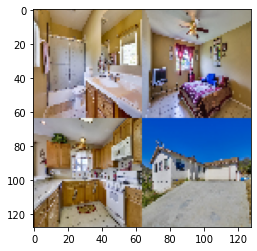

In [9]:
plt.imshow(images[100][..., ::-1])

In [10]:
X_train, X_test, IX_train, IX_test = train_test_split(data, images, random_state=523)

In [11]:
maxPrice = X_train['price'].max()
y_train = X_train['price'] / maxPrice
y_test = X_test['price'] / maxPrice

In [12]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import concatenate, Input, Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout, BatchNormalization

2023-03-15 13:17:47.952967: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 13:17:48.197955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ali/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-03-15 13:17:48.198002: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-15 13:17:48.253963: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already b

In [13]:
input1 = Input(shape=(128, 128, 3))
conv1 = Conv2D(32, (3, 3), padding='same', activation='relu')(input1)
batchnorm1 = BatchNormalization(axis=-1)(conv1)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)

conv2 = Conv2D(64, (3, 3), padding='same', activation='relu')(maxpool1)
batchnorm2 = BatchNormalization(axis=-1)(conv2)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)

conv3 = Conv2D(128, (3, 3), padding='same', activation='relu')(maxpool2)
batchnorm3 = BatchNormalization(axis=-1)(conv3)
maxpool3 = MaxPooling2D(pool_size=(2, 2))(batchnorm3)

conv4 = Conv2D(64, (3, 3), padding='same', activation='relu')(maxpool3)
batchnorm4 = BatchNormalization(axis=-1)(conv4)
maxpool4 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)


flatten1 = Flatten()(maxpool4)
dense1 = Dense(32, activation='relu')(flatten1)
batchnorm5= BatchNormalization(axis=-1)(dense1)
dropout1 = Dropout(0.5)(batchnorm5)
dense2 = Dense(16, activation='relu')(dropout1)

2023-03-15 13:17:51.380165: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-03-15 13:17:51.380313: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: momeni
2023-03-15 13:17:51.380366: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: momeni
2023-03-15 13:17:51.380858: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.108.3
2023-03-15 13:17:51.380952: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.108.3
2023-03-15 13:17:51.380974: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.108.3
2023-03-15 13:17:51.381930: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical ope

In [14]:
m1 = Model(input1, dense2)

In [15]:
m1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256   

In [16]:
ss = StandardScaler()
XT = ss.fit_transform(X_train[['bedrooms', 'bathrooms', 'area']])
Xt = ss.transform(X_test[['bedrooms', 'bathrooms', 'area']])

In [17]:
lb = LabelBinarizer()
lb.fit(data['zipcode'])
XTz = lb.transform(X_train['zipcode'])
Xtz = lb.transform(X_test['zipcode'])

In [18]:
XTz[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [19]:
XT = np.hstack([XT, XTz])
Xt = np.hstack([Xt, Xtz])

In [20]:
XT[0]

array([0.51790082, 0.32814078, 0.36211477, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [21]:
XT.shape

(401, 52)

In [23]:
m2 = Sequential()
m2.add(Dense(16, activation='relu', input_dim=52))
m2.add(Dropout(0.4))
m2.add(Dense(32, activation='relu'))
m2.add(Dense(64, activation='relu'))
m2.add(Dropout(0.4))
m2.add(Dense(32, activation='relu'))
m2.add(Dense(16,activation='relu'))
m2.add(Dense(8, activation='relu'))

In [24]:
m2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                848       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                5

In [25]:
combinedModel = concatenate([m2.output, m1.output])

In [26]:
densef1 = Dense(8, activation='relu')(combinedModel)
densef2 = Dense(1, activation='linear')(densef1)
model = Model(inputs=[m2.input, m1.input], outputs=densef2)

In [27]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                           

In [28]:
from tensorflow.keras.utils import plot_model

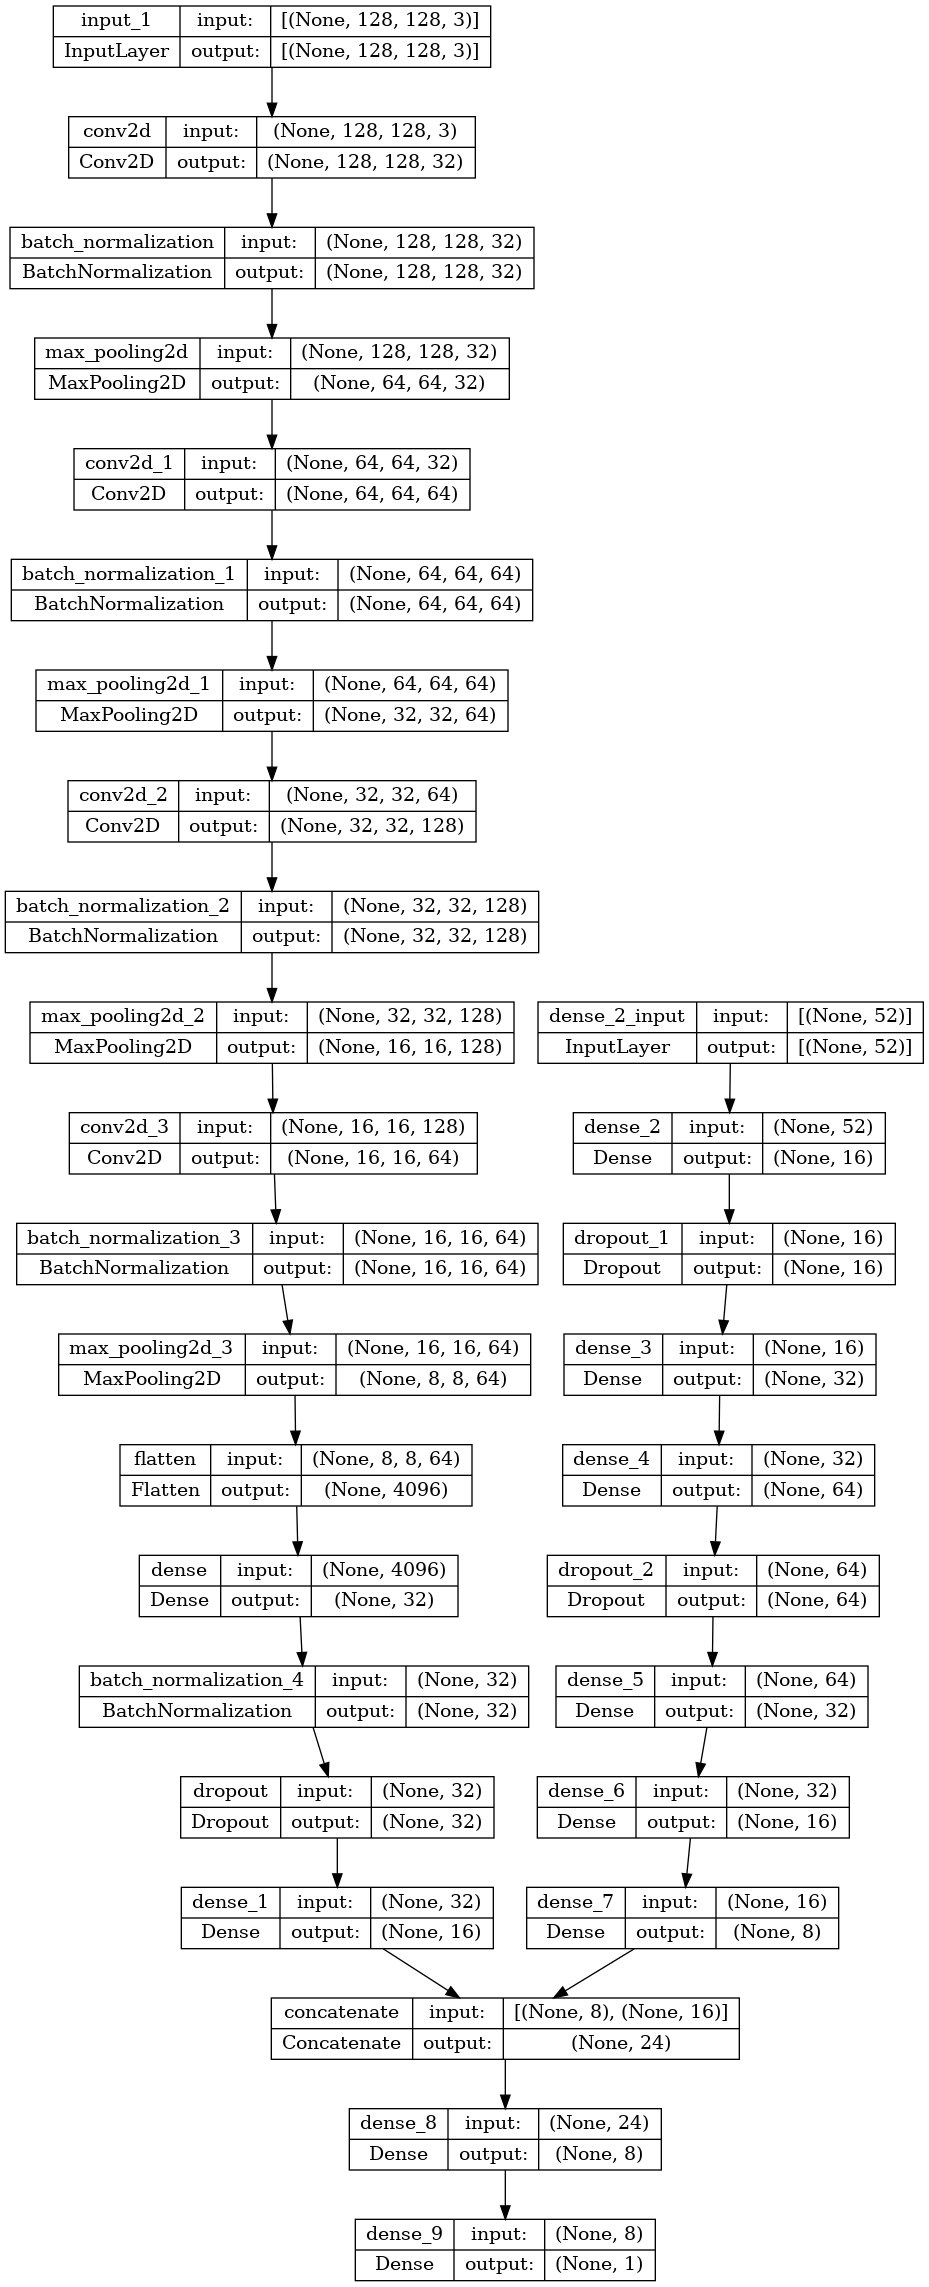

In [29]:
plot_model(model, show_shapes=True)

In [31]:
model.compile(optimizer='adam', loss='mean_absolute_error',metrics=['accuracy'])

In [32]:
history= model.fit([XT, IX_train], y_train, validation_data=([Xt, IX_test], y_test), epochs=100, batch_size=10)

Epoch 1/100
41/41 [==============================] - 14s 301ms/step - loss: 0.6159 - accuracy: 0.0000e+00 - val_loss: 2.8575 - val_accuracy: 0.0000e+00
Epoch 2/100
41/41 [==============================] - 13s 306ms/step - loss: 0.1807 - accuracy: 0.0000e+00 - val_loss: 0.1935 - val_accuracy: 0.0000e+00
Epoch 3/100
41/41 [==============================] - 12s 304ms/step - loss: 0.1201 - accuracy: 0.0000e+00 - val_loss: 0.1063 - val_accuracy: 0.0000e+00
Epoch 4/100
41/41 [==============================] - 12s 295ms/step - loss: 0.0981 - accuracy: 0.0000e+00 - val_loss: 0.0946 - val_accuracy: 0.0000e+00
Epoch 5/100
41/41 [==============================] - 12s 288ms/step - loss: 0.0864 - accuracy: 0.0000e+00 - val_loss: 0.0867 - val_accuracy: 0.0000e+00
Epoch 6/100
41/41 [==============================] - 13s 308ms/step - loss: 0.0818 - accuracy: 0.0000e+00 - val_loss: 0.0819 - val_accuracy: 0.0000e+00
Epoch 7/100
41/41 [==============================] - 12s 299ms/step - loss: 0.0757 - acc

In [33]:
predicts = model.predict([Xt, IX_test]) * maxPrice

5/5 [==============================] - 1s 167ms/step


In [34]:
predicts.flatten()

array([ 778713.64355087,  493821.74015045,  184183.26973915,
        506714.64204788,  476313.11416626,  513931.69164658,
        120300.83686113,  120300.83686113,  756197.86977768,
        549767.13657379,  248936.7723465 ,  541481.61411285,
        120300.83686113,  271484.97104645,  120300.83686113,
        456935.43553352,  552282.21416473,  120300.83686113,
        542423.30789566,  120300.83686113, 1126912.47463226,
       1562200.18863678,  370412.79673576,  388909.19089317,
        669163.04826736,  120300.83686113,  486853.74855995,
        426903.36704254,  487129.18162346,  120300.83686113,
        960742.23518372,  371524.75118637,  339330.34539223,
        398027.12202072,  625230.13353348,  579501.4500618 ,
        418789.47615623,  120300.83686113,  577209.94949341,
        419343.17350388,  170922.08564281,  177687.76416779,
        369909.31630135,  572134.79280472,  867538.33293915,
        921913.32578659,  602453.70864868, 1334798.9320755 ,
        245707.39269257,

In [35]:
y_test.values * maxPrice

array([1039000.,  529800.,  184900.,  569950.,  309900.,  529000.,
         99000.,   69900., 1495000.,  557000.,  335000.,  547900.,
         74900.,  144900.,  117500.,  399900.,  455000.,  214900.,
        699000.,  104900.,  869000., 3850000., 5858000.,  499000.,
        895000.,  219500.,  599500.,  449000.,  500000.,  103500.,
        519200.,  664900.,  538000.,  449000.,  599999.,  649000.,
        310000.,   69500.,  479000.,  435000.,   97500.,  400000.,
        360000.,  567000., 1039000., 1327685.,  619000., 2150000.,
        458000.,  445000.,  629000.,  649000.,  549950.,  539900.,
        599999.,  695000.,  147000.,  310000.,  599000.,  385000.,
        259000.,  700000., 1195000.,  429900.,  639000.,  245000.,
        525000.,  710000.,  579000.,  925000.,  644900.,  895000.,
        750000.,  549999.,  625000.,  117000.,  962500.,  521500.,
        235000., 1500000.,   69900.,  135000.,  725000.,  529999.,
        389900.,  365000., 1299000., 1294000.,  530000.,  5348

In [50]:
diff = abs(predicts.flatten() - (y_test * maxPrice))

In [51]:
diff

11     260286.356449
81      35978.259850
75        716.730261
524     63235.357952
436    166413.114166
           ...      
430     89925.675297
92     492906.896114
141    183676.679134
244     60429.614592
486     74485.814571
Name: price, Length: 134, dtype: float64

In [52]:
diff.mean()

192273.09638134402

In [39]:
data['price'].mean()

589362.8112149533

In [40]:
data['price'].std()

509026.06764905644

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error

In [42]:
r2_score(y_pred=predicts.flatten(), y_true=(y_test * maxPrice))

0.2618904060965286

In [43]:
abs(model.predict([Xt, IX_test]).flatten() - y_test).mean() * maxPrice

5/5 [==============================] - 1s 163ms/step


192273.09638134405

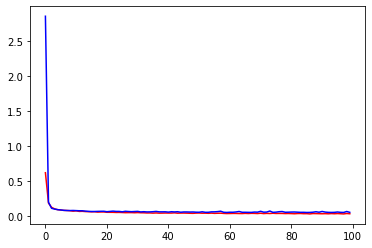

In [ ]:
plt.plot(history.history['loss'], color='red', label='Loss Data')
plt.plot(history.history['val_loss'], color='blue', label='Loss Data')